In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
plt.style.use("default")

Для начала считаем данные из csv-файла:

In [3]:
training_set = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv"
)
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Результат работы функции - предпросмотр загруженных данных. Рассмотрим внимательнее, что содержится в данном датасете. Ниже представлена краткая информация о каждом из столбцов датасета:

PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как идентификатор строки и, что логично, идентификатор пассажира (т.к. для каждого пассажира в датасете представлена только одна строка).

Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

Name: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.

Sex: Пол пассажира. Либо мужчины (=Male) либо женщины (=Female).

Age: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записан в датасет.

SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

Parch: Количество родителей детей (Number of parents of children travelling with each passenger).

Ticket: Номер билета.

Fare: Сумма, которую заплатил пассажир за путешествие.

Cabin: Номер каюты пассажира. "NaN" значения в этой колонке указывает на то, что номер каюты данного пассажира не был записан.

Embarked: Порт отправления данного пассажира.

.describe() отобразит различные величины, такие как количество, среднее, среднеквадратичное отклонение и т.д. для численных типов данных.

Это может быть полезным для понимания распределения значений по датасету и статистики, особенно когда нет возможности просмотреть все записи в виду огромного их количества

In [4]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Очень часто во множестве данных будут присутствовать отсутствующие данные. Используем метод isnull. Результатом вызова данного метода является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» ( True ) означает, что значение является отсутствующим значением, а «Ложь» ( False ) означает, что значение не является отсутствующим.

.describe(include = ['O']) отобразит статистики (descriptive statistics) объектного типа. Это нужно для нечисловых данных, когда нельзя просто посчитать максимумы/среднее/и пр. для данных. Мы можем отнести такие данные к категориальному виду

In [5]:
training_set.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Видно, что существуют дубликаты номеров билетов Ticket и переиспользуются каюты Cabins (уникальных записей (unique) меньше, чем общего количества). Самый большой порядок дубликата билета - "347082". Он повторился 7 раз. Аналогично, наибольшее число людей, занимающих одну и ту же каюту - 4. Они используют каюты "B96 B98". Также можно заметить, что 644 человека отбыли из порта "S". Среди 891 записей, 577 были мужчины (Male), оставшиеся - женщины (Female).

## Описание каждого признака

Гистограмма распределения признаков

In [6]:
def custom_hist(training_set, title, xlabel, ylabel="Количество", bins=None):
    figsize = (20, 6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

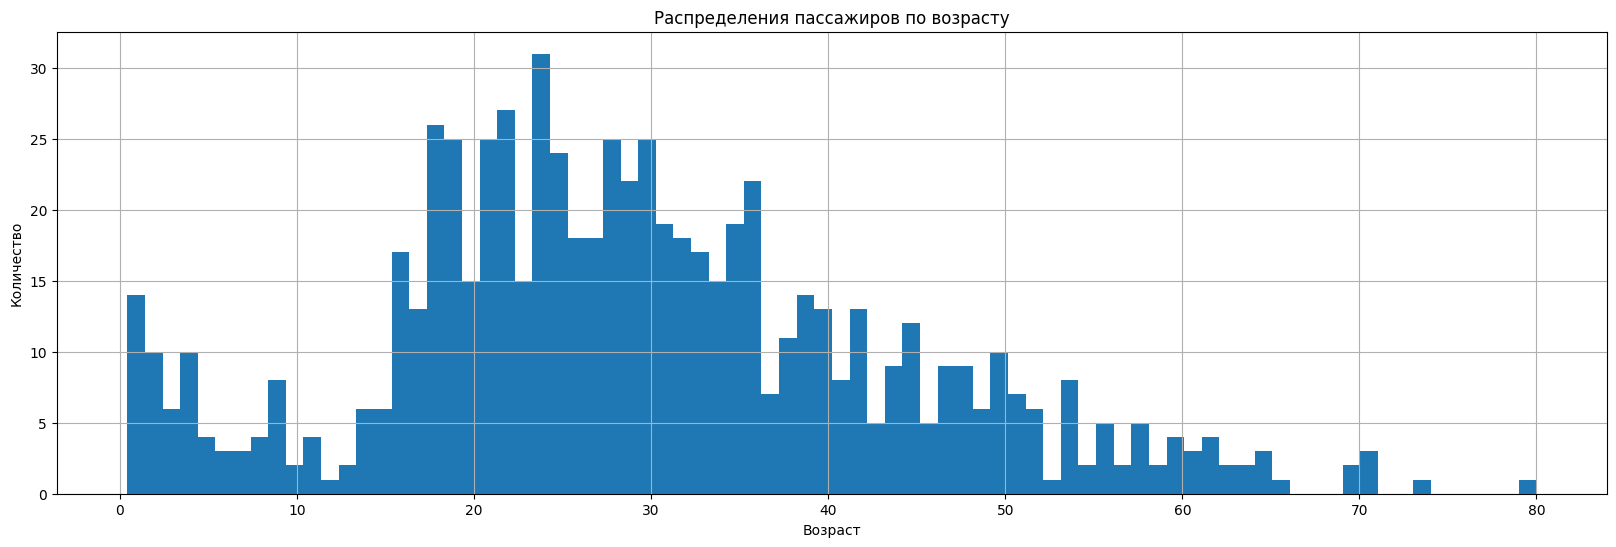

In [7]:
custom_hist(training_set["Age"], "Распределения пассажиров по возрасту", "Возраст")

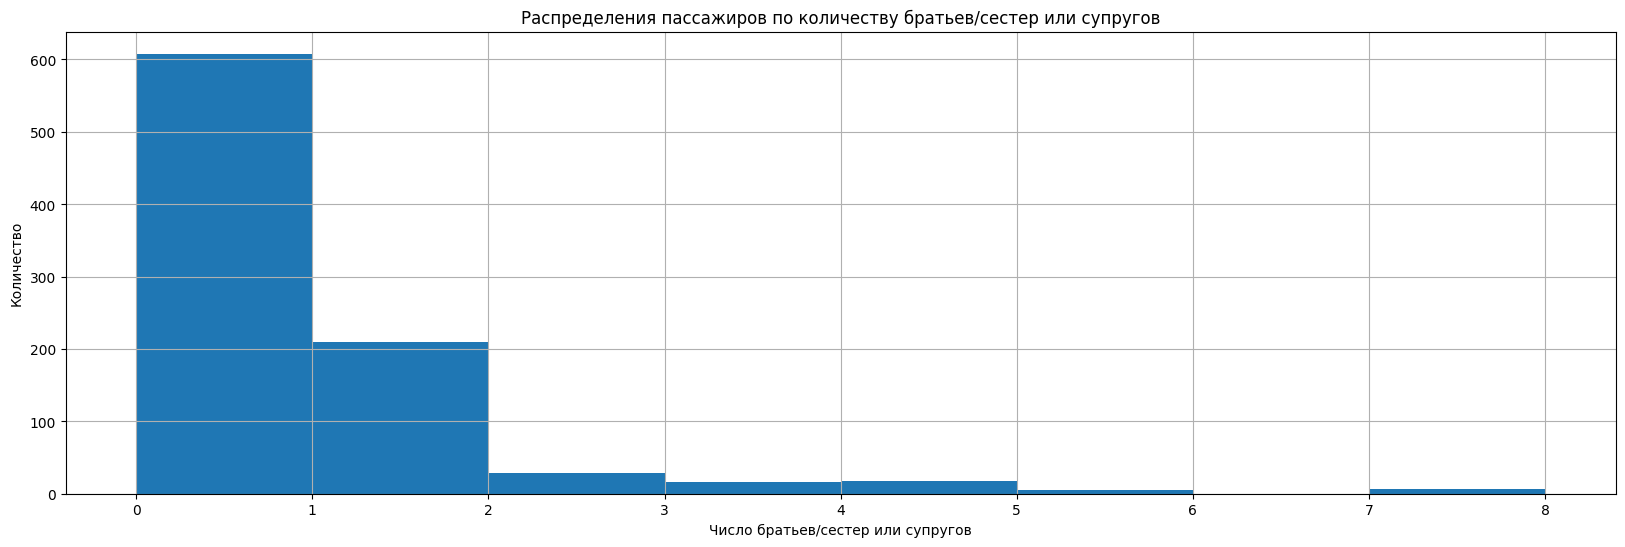

In [8]:
custom_hist(
    training_set["SibSp"],
    "Распределения пассажиров по количеству братьев/сестер или супругов",
    "Число братьев/сестер или супругов",
)


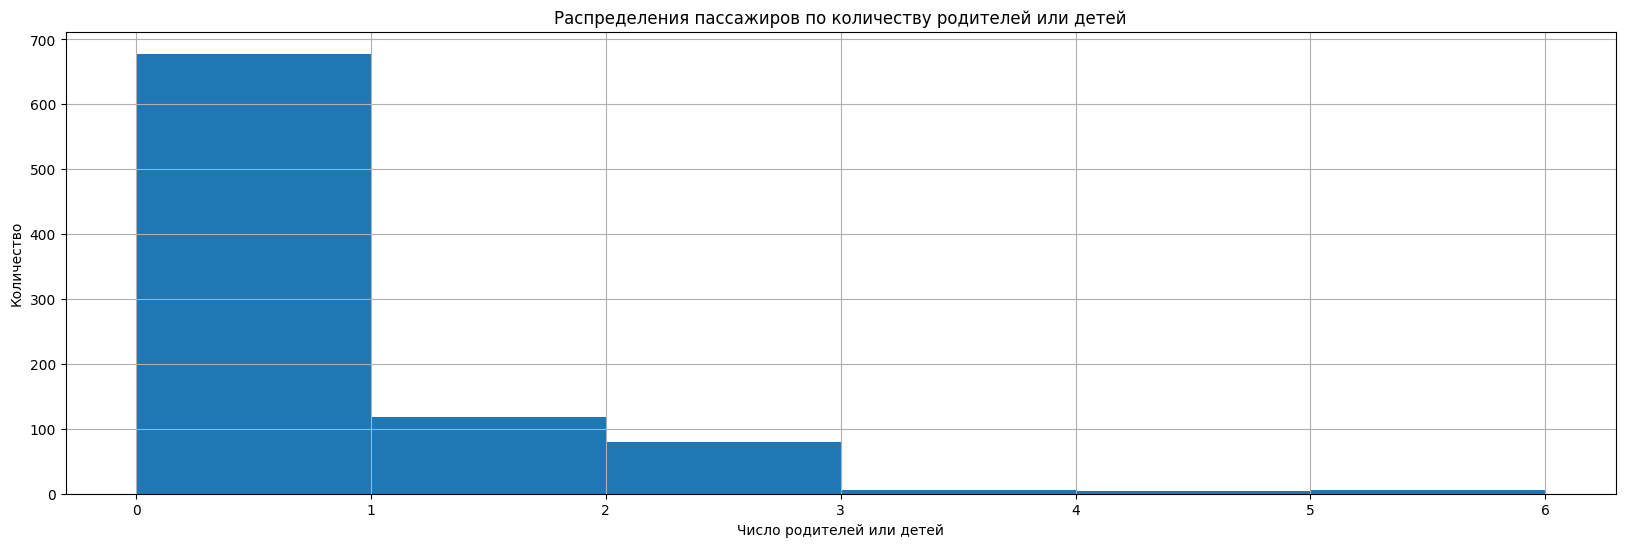

In [9]:
custom_hist(
    training_set["Parch"],
    "Распределения пассажиров по количеству родителей или детей",
    "Число родителей или детей",
)


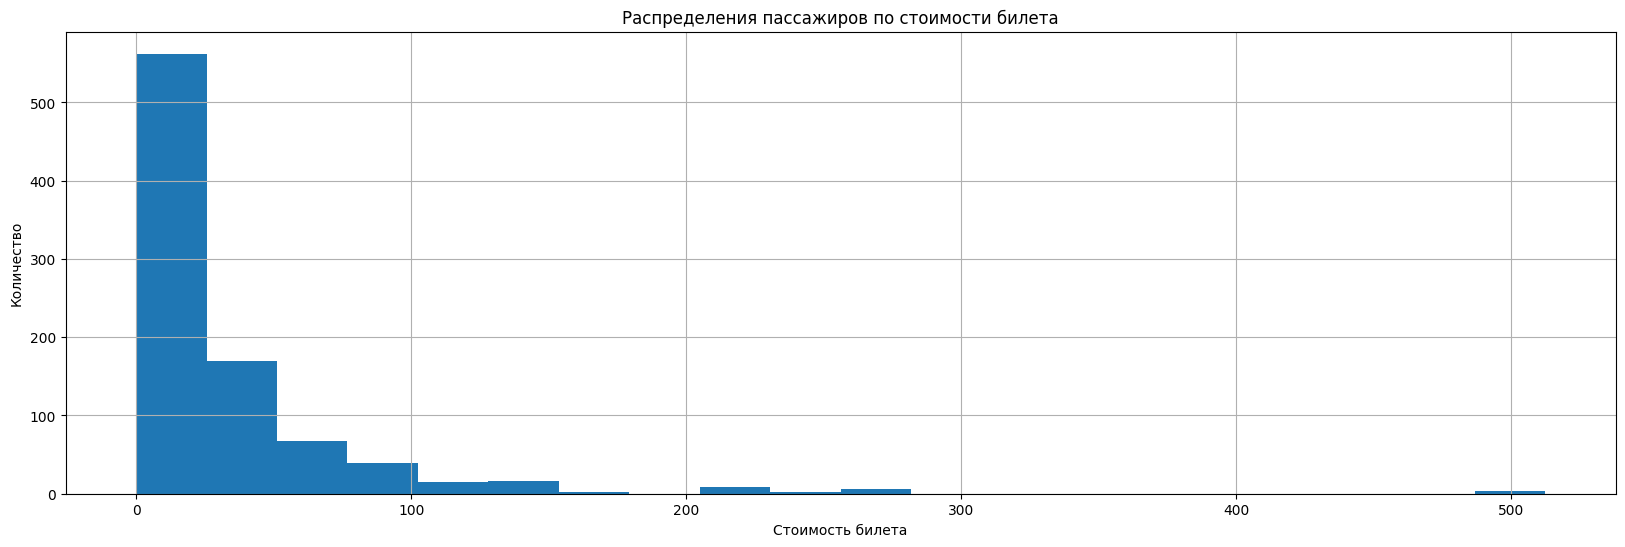

In [10]:
custom_hist(
    training_set["Fare"],
    "Распределения пассажиров по стоимости билета",
    "Стоимость билета",
    bins=20,
)


Далее проанализируем возраст людей, это мы сделаем с помощью графика распределения. На графике мы видим, что средний возраст пассажиров составляет 20-35 лет.

<Axes: ylabel='Frequency'>

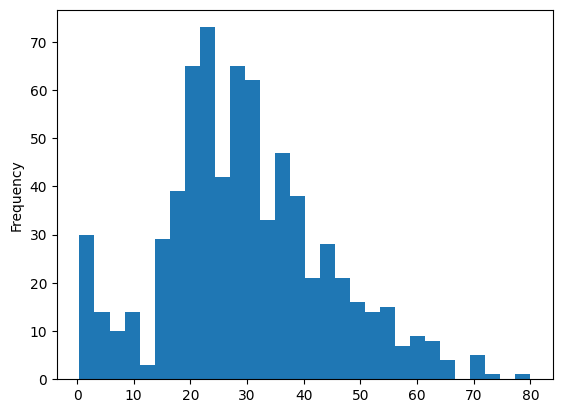

In [11]:
training_set["Age"].plot.hist(bins=30)

Проведем исследования столбца SibSp, означающий сестра,братья/супруги. Из графика мы видим, что большинство не имело братьев и сестер, а так же супругов, следующий столбец -1- учитывает супругов

<Axes: xlabel='SibSp', ylabel='count'>

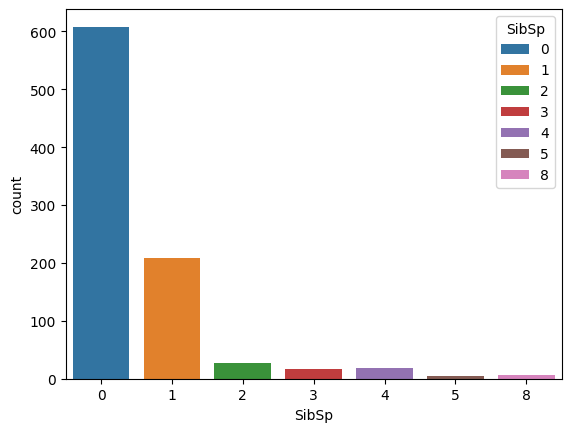

In [12]:
sns.countplot(x="SibSp", data=training_set, hue="SibSp", palette="tab10")

Следующий столбец который будем исследовать - Fare, обозначает сколько люди платили за билет.

In [13]:
training_set["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

Построим гистограмму:

<Axes: >

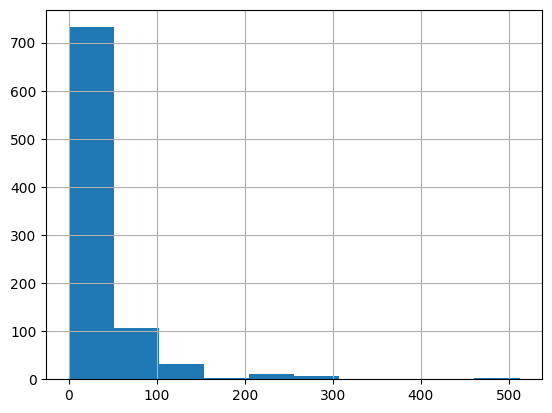

In [14]:
training_set["Fare"].hist()

Из этого графика мы видим, что наибольшее распределение от 0 до 150, рассмотрим этот диапазон более подробно. Из графика мы видим, что наибольшее количество билетов были по цене до 50. Это действительно так, так как мы видим из данных, что большинство пассажиров было из третьего класса.

<Axes: >

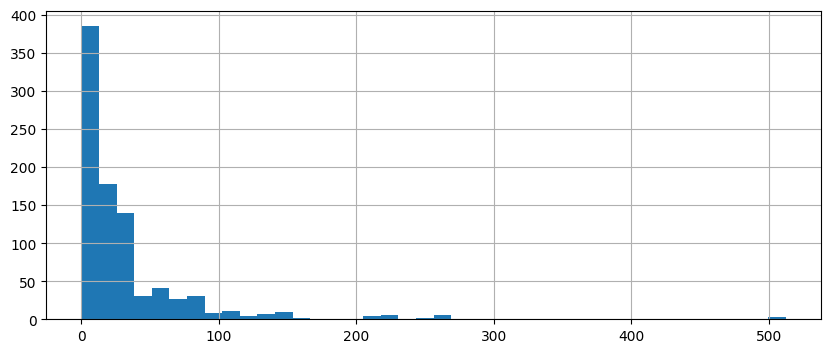

In [15]:
training_set["Fare"].hist(bins=40, figsize=(10, 4))

## Описание вида совместного распределения

Установим соотношение выживших и не выживших

<Axes: xlabel='Survived', ylabel='count'>

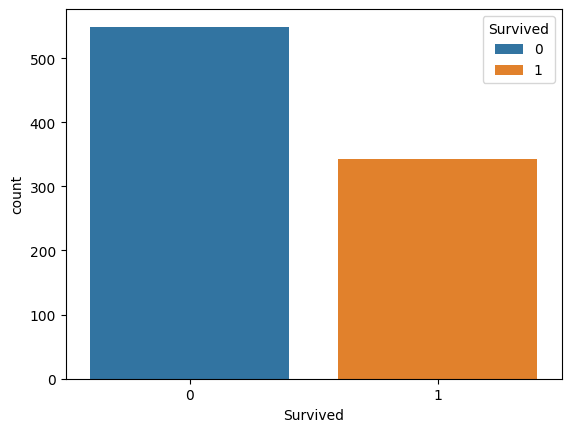

In [16]:
sns.countplot(x="Survived", data=training_set, hue="Survived")

Отобразим пол выживших и не выживших. На графике мы видим, что среди не выживших большинство было мужчин, в выживших наоборот больше было женщин

<Axes: xlabel='Survived', ylabel='count'>

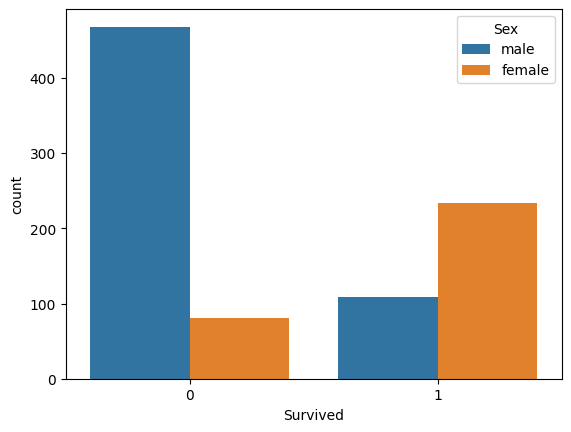

In [17]:
sns.countplot(x="Survived", data=training_set, hue="Sex")

В параметре hue мы можем использовать другой столбец, например класс пассажира Pclass, и посмотреть как это соотносится с количеством выживших. Проанализировав полученный график, можно сказать, что из не выживших было больше людей третьего класса

<Axes: xlabel='Survived', ylabel='count'>

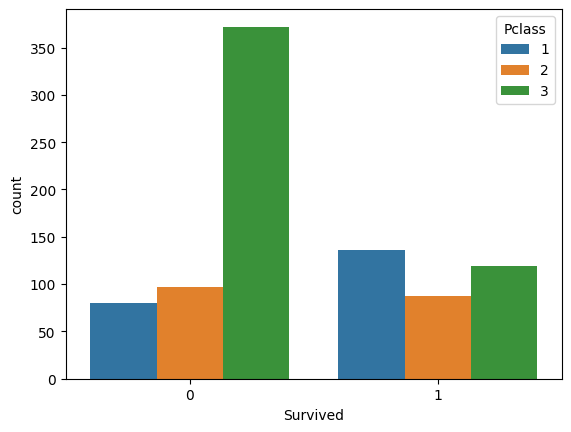

In [18]:
sns.countplot(x="Survived", data=training_set, hue="Pclass", palette="tab10")

Создадим boxplot, передадим три параметра, класс пассажира, возраст, датасет. Из полученного графика можно сделать вывод, что средний возраст пассажиров первого класса больше чем средний возраст пассажиров второго класса, и соответственно средний возраст пассажиров второго класса больше чем средний возраст пассажиров третьего класса. Мы можем использовать эти среднии значения для того что бы вставлять эти значения там где они отсутствуют, основываясь на классе.

<Axes: xlabel='Pclass', ylabel='Age'>

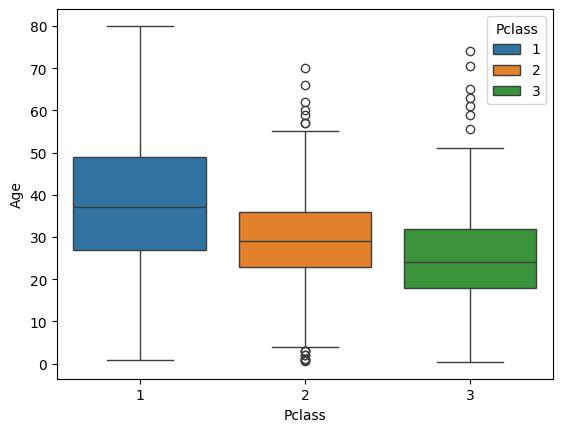

In [19]:
sns.boxplot(x="Pclass", y="Age", hue="Pclass", data=training_set, palette="tab10")

В процессе анализа данных мы попробуем увидеть зависимости целевого признака от остальных признаков и остальных признаков между собой, чтобы избежать мультиколлинеарности и выбрать признаки, которые не имеют значения и которые стоит удалить.

Для признаков class, sex, sib_sp, par_ch, embarked визуализируем доли выживших для каждого значения признака:

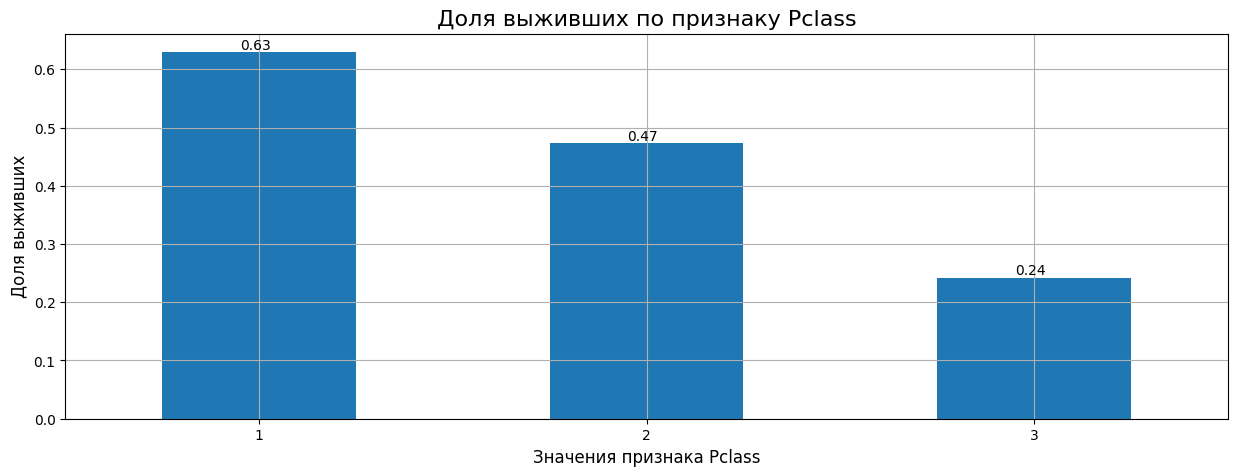

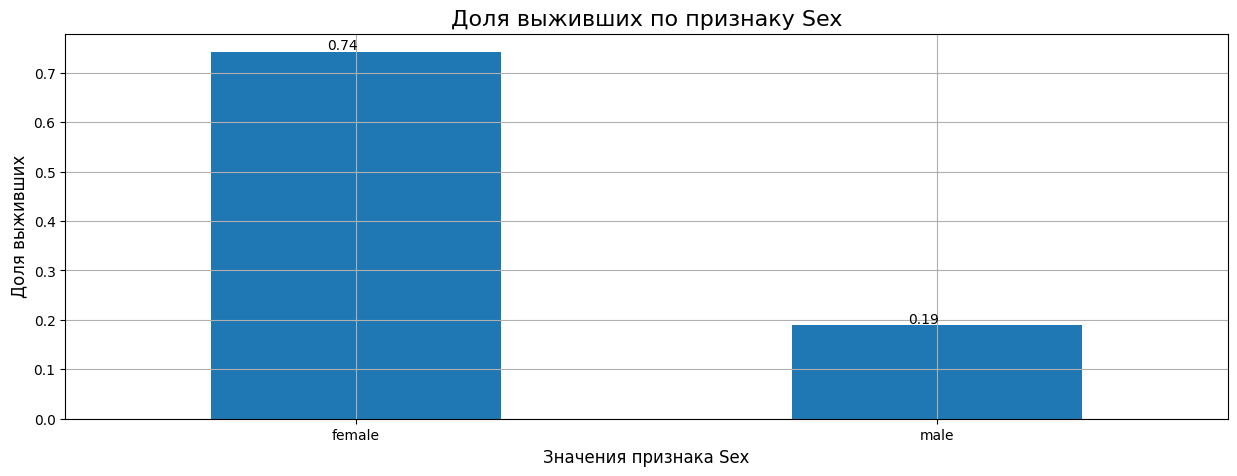

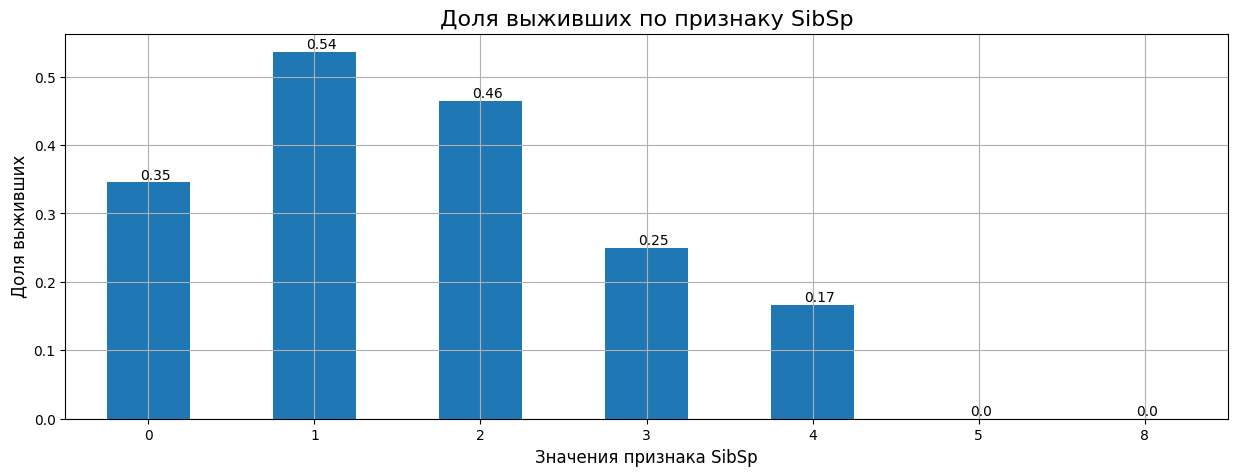

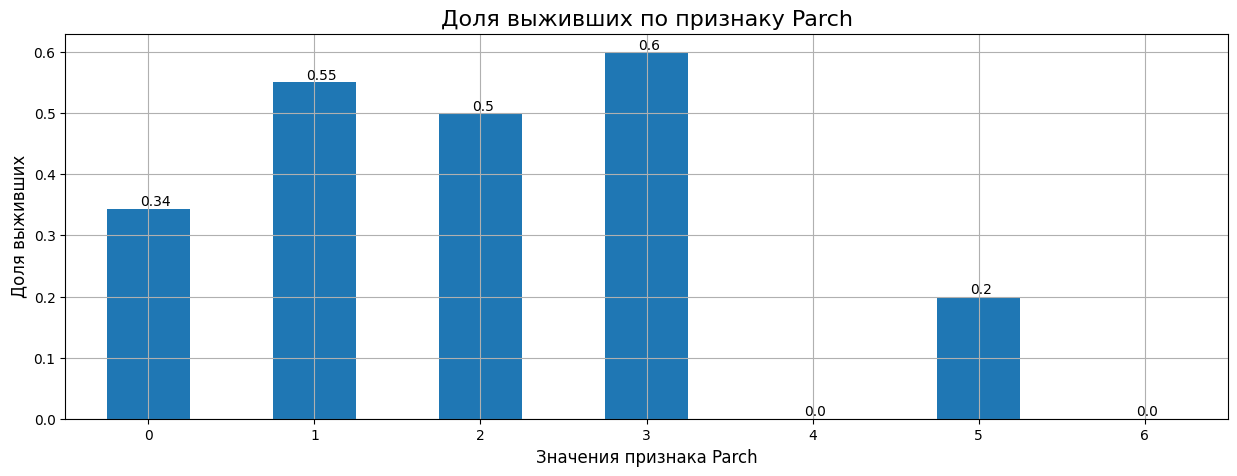

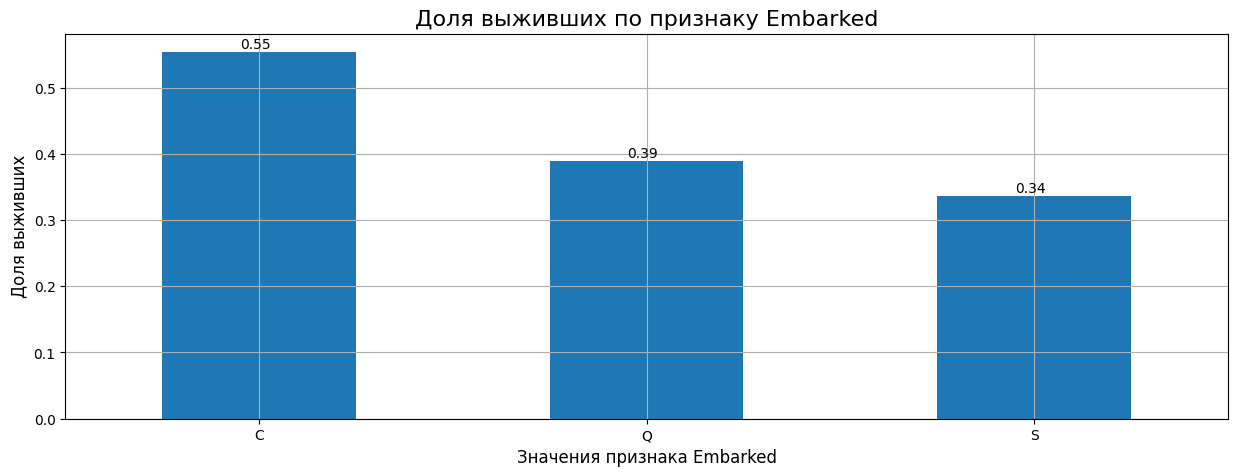

In [20]:
columns_to_look = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values="Survived", aggfunc="mean")

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(f"Доля выживших по признаку {column}", fontdict={"size": 16})
    ax.set_ylabel("Доля выживших", fontdict={"size": 12})
    ax.set_xlabel(column, fontdict={"size": 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - 0.05, value + 0.005, round(value, 2))

    pivot.plot(kind="bar", rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f"Значения признака {column}", fontdict={"size": 12})
    plt.show()


Видим, что ни один из признаков не стоит убирать из таблицы, т.к. значения доли выживших сильно отличается. Разумеется, различия могуть быть вызваны случайностью, особенно на больших значениях признаков SibSp и Parch, т.к. объектов с такими значениями мало и доля выживших не очень информативна. Но удалить эти признаки мы всё-таки не можем, т.к. значения доли различны.

Видно, что особенно значимое влияние на значение целевого признака оказывает пол пассажира. Довольно значимым признаком так же является класс.

## Исследование пропущенных значений

Используем метод .info(), чтобы увидеть больше информацию о типах данных/структуре в тренировочной выборке.

In [21]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Можно увидеть, что значение Age не задано для большого количества записей. Из 891 строк, возраст Age задан лишь для 714 записей. Аналогично, номер каюты "Cabin" также пропущены для большого количества записей. Только 204 из 891 записей содержат значения Cabin.

In [22]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Всего 177 записей с пропущенным возрастом (Age), 687 записей с пропущенным значение каюты Cabin и для 2 записей не заданы порты отправления Embarked.

## Исследование отсутствующих значений

Приступим к исследованию отсутствующих значений.

При вызове метода isnull получаем таблицу с булевыми значениями, False - присутствуют данные, True - данные отсутствуют

In [23]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Для визуализации представленых булевых значений воспользуемся Seaborn heatmap, с помощью чего сможем увидеть где больше всего отсутствующих данных. Желтый цвет нам говорит о пропущенных значениях. Наглядно видно, что много отсутствующих данных в столбце Age и Cabin.

<Axes: >

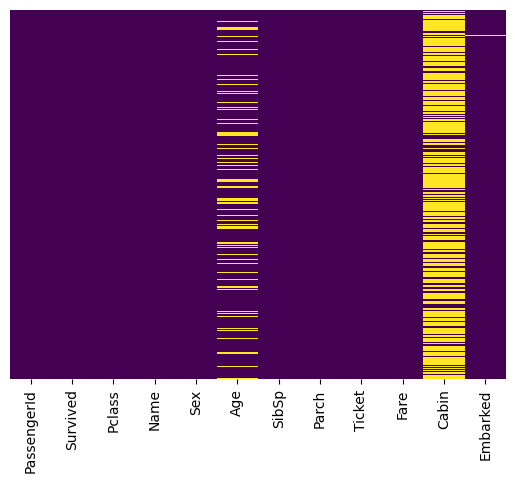

In [24]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Проверим имеются ли значения null, запустив следующий код

<Axes: >

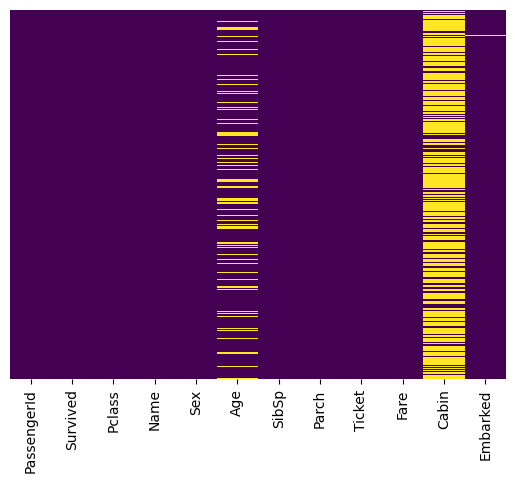

In [25]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Осталось большое количество отсутствующих данных в столбце Cabin (Каюты), если бы мы использовали этот столбец для анализа, то тогда можно было бы применить способ что бы предугадать пропущеные значения, но столбец нам не нужен, поэтому мы можем его просто отбросить, при помощи кода представленного ниже

In [26]:
training_set.drop("Cabin", axis=1, inplace=True)

Проверим нашу таблицу, и увидим что столбец отсутствует

In [27]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

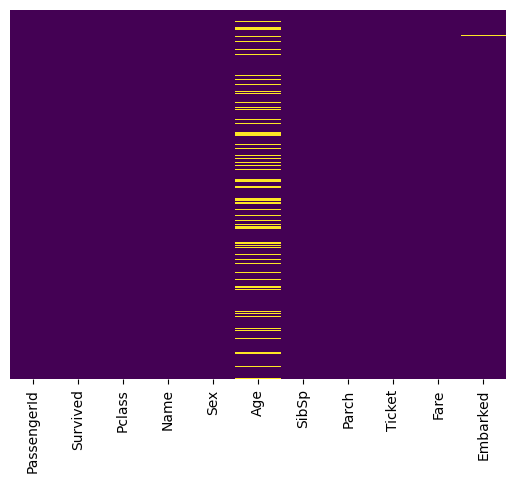

In [28]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Мы видим что осталось одно отсутствующее значение и мы можем легко от него избавиться, код ниже удаляет строки с отсутствующими значениями

In [29]:
training_set.dropna(inplace=True)

Перезапустим код и видим что мы не имеем отсутствующих значений. Таким образом мы совершили первый шаг очистки данных, мы очистили наши данные от отсутствующих данных, какие то отсутствующие данные мы заполнили средними значениями, а некоторые просто удалили.

## Преобразование категориальных признаков


Далее мы будем работать с категориальными характеристиками. Нам необходимо конвертировать категориальные характеристики в численные, так как большинство моделей машинного обучения не может работать с текстовыми данными как входными.

Рассмотрим столбец Sex(пол). Мы видим категории male и female, алгоритм машинного не может принимать строку, т.е. мы должны создать еще один столбец в котором будут нули и единицы, т.е. мы должны закодировать эти категории, чтобы алгоритм машинного обучения мог их понять. Это называется создание фиктивной переменной. И то же самое мы сделаем для столбца Embarked (порт прибытия), так как в этом столбце буквы которые представляют города.

Рассмотрим кодирование категорий целочисленными значениями (label encoding). В этом случае уникальные значения категориального признака кодируются целыми числами. Кодирование категорий целочисленными значениями - LabelEncoder, предполагается что значения категорий заменяются целыми числами в случайном порядке

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set["Sex"])


Выведем уникальные значения данного признака:

In [32]:
training_set["Sex"].unique()

array(['male', 'female'], dtype=object)

Теперь посмотрим уникальные значения после преобразования:

In [33]:
np.unique(cat_enc_le)

array([0, 1])

С помощью созданного объекта можно выполнить обратное преобразование:

In [34]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

В зависимости от данных это преобразование может создать новую проблему. Мы перевели набор стран в набор чисел. Но это всего лишь категориальные данные, и между числами на самом деле нет никакой связи. Проблема здесь в том, что, поскольку разные числа в одном столбце, модель неправильно подумает, что данные находятся в каком-то особом порядке — 0 < 1 < 2 Хотя это, конечно, совсем не так.

Поэтому LabelEncoder можно применять с осторожностью. По этому принципу можно преобразовывать бинарные переменные (такие как пол) или переменные, измеренные по ординальной шкале. Но ординальные переменные надо преобразовывать не в случайном порядке, а в строго определенном, в естественном порядке.

Для решения проблемы мы используем OneHotEncoder. Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще.

In [35]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(
    training_set[["Embarked"]]
)  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy


Выведем изначальную форму датасета:

In [36]:
training_set.shape

(712, 11)

Теперь форму преобразованного вектора (изначально это был всего лишь один столбец):

In [37]:
cat_enc_ohe.shape

(712, 3)

То же самое преобразование можно сделать при помощи встроенного в pandas метода get_dummies().

Вызовем метод get_dummies передаем столбец Sex, данный метод конвертирует категориальные переменные в фиктивные переменные, так же они известные как переменные-индикаторы

In [38]:
pd.get_dummies(training_set["Sex"])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


Получаем такой результат, т.е. у нас два столбца и 0 и 1 в качестве значений, можно расценивать как булевы значения, 0 это False, 1 это True. Первая строка говорит нам о том что male = 1 означает что человек был мужского пола.

Но мы получаем проблему: один столбец идеально предсказывает второй столбец, т.е. если мы зададим такие входные данные в алгоритм машинного обучения, то он поймет что в случае если в одном столбце ноль в другом обязательно будет 1. Эта проблема называется мультиколлинеарностью. Это запутывает алгоритм. Решением будет удаление одного столбца.

In [39]:
pd.get_dummies(training_set["Sex"], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


Присвоим это значение переменной sex

In [40]:
sex = pd.get_dummies(training_set["Sex"], drop_first=True)

Сделаем тоже самое для столбца Embarked

In [41]:
embark = pd.get_dummies(training_set["Embarked"], drop_first=True)

У нас было три значения S,C,Q по названиям портов отправки, мы отбросили C у нас осталось два столбца, но они не являются предсказателями друг для друга:

In [42]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


Добавим вновь созданные столбцы sex, embark в наше множество данных при помощи метода pd.concat мы добавляем список указываем training_set и добавляем столбцы sex, embark и указываем еще один параметр axis=1 что бы указать что это будут столбцы.

In [43]:
training_set = pd.concat([training_set, sex, embark], axis=1)

Мы видим что у нас остались старые столбцы но так же добавились и новые:

In [44]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


Удаляем ненужные столбцы

In [45]:
training_set.drop(
    ["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True
)

In [46]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Таким образом мы получили итоговый набор данных, подготовленный к машинному обучению. Это набор данных удовлетворяет всем условиям чистых данных, и при этом содержит всю информацию из первоначального датасета.

## Задания для самостоятельного выполнения

Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [164]:
model = LogisticRegression().fit(
    training_set.drop("Survived", axis=1), training_set["Survived"]
)
y_pred = model.predict(training_set.drop("Survived", axis=1))

c:\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
print("Точность простой модели:", f1_score(y_pred, training_set["Survived"]))

Точность простой модели: 0.7454545454545455


**Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:**

1) Какова доля выживших после крушения пассажиров?

0.4044943820224719

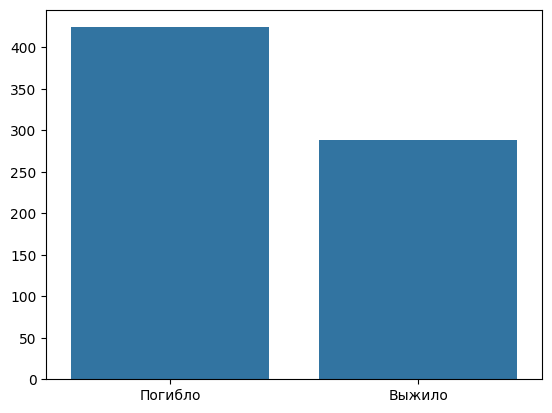

In [ ]:
sns.barplot(x=['Погибло', 'Выжило'], y=training_set["Survived"].value_counts().values)
training_set["Survived"].sum() / len(training_set)


2. Какова доля мужчин и женщин среди выживших?

Доля выжевших мужчин 0.3229166666666667


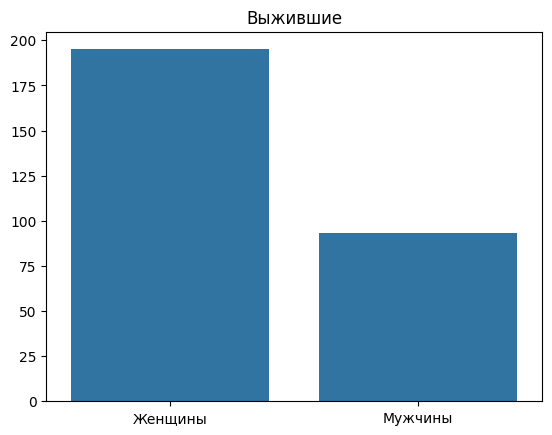

In [ ]:
survs = training_set[training_set["Survived"] == 1]["male"]
sns.barplot(x=["Женщины", "Мужчины"], y=survs.value_counts().values).set_title('Выжившие')
print("Доля выжевших мужчин", survs.sum() / len(survs))


3. Сколько пассажиров ехало в каждом классе?

1 класс: 184
2 класс: 173
3 класс: 355


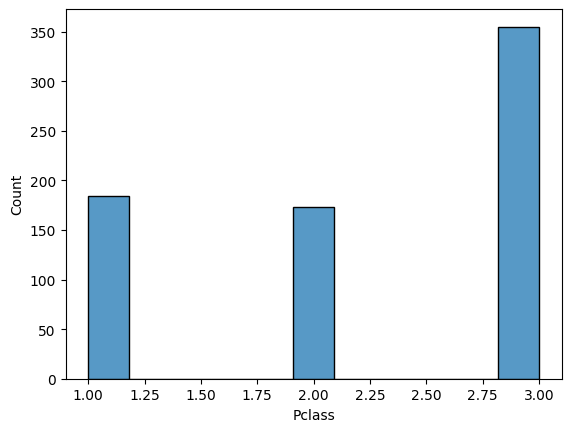

In [ ]:
sns.histplot(training_set, x="Pclass")
for n in (1, 2, 3):
    print(f"{n} класс: {(training_set['Pclass']==n).sum()}")


4. Кого было больше в самом многолюдном классе — мужчин или женщин?

Самый многолюдный класс - 3-й

Женщин: 101
Мужчин: 83


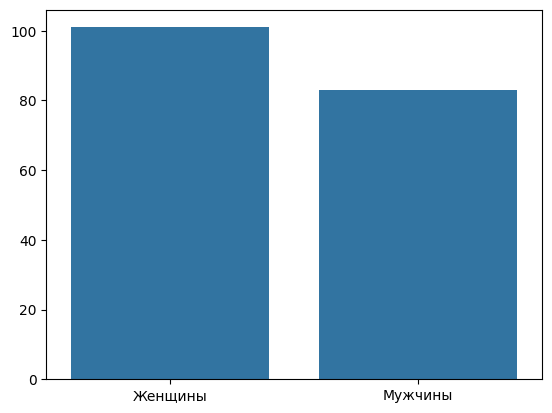

In [ ]:
class3 = training_set[training_set["Pclass"] == 1]["male"]
sns.barplot(x=["Женщины", "Мужчины"], y=class3.value_counts().values)
print(f"Женщин: {(class3 == 1).sum()}")
print(f"Мужчин: {(class3 == 0).sum()}")


5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Все, от ненужных мы избавились ранее

6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. 

In [ ]:
# Слабая кореляция
training_set[["Fare", "Age"]].corr()

,Fare,Age
Fare,1.000000,0.093143
Age,0.093143,1.000000


Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

<Axes: xlabel='Age', ylabel='Fare'>

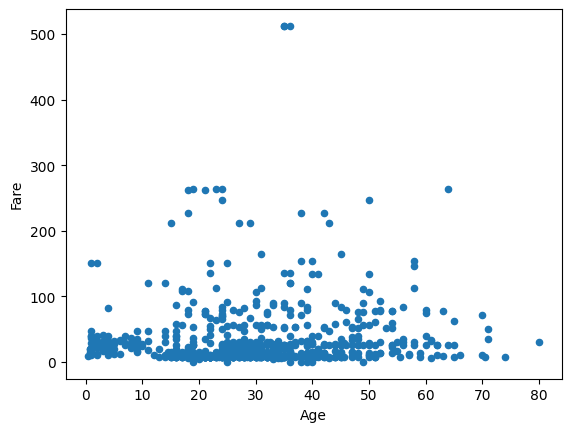

In [ ]:
training_set.plot.scatter("Age", "Fare")
# Зависимости все еще нет

7. Правда ли, что чаще выживали пассажиры с более дорогими билетами?

(0.0, 75.0)

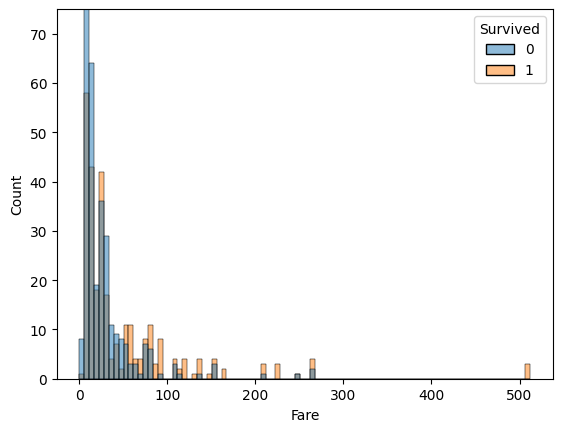

In [ ]:
sns.histplot(training_set, x="Fare", hue="Survived")
plt.ylim([0, 75])
# Нельзя сказать что в дорогих билетах выжл больший процент людей

8. А есть ли зависимость выживаемости от класса?

Выживаемость в 1 классе: 0.6521739130434783
Выживаемость в 2 классе: 0.4797687861271676
Выживаемость в 3 классе: 0.23943661971830985


<Axes: >

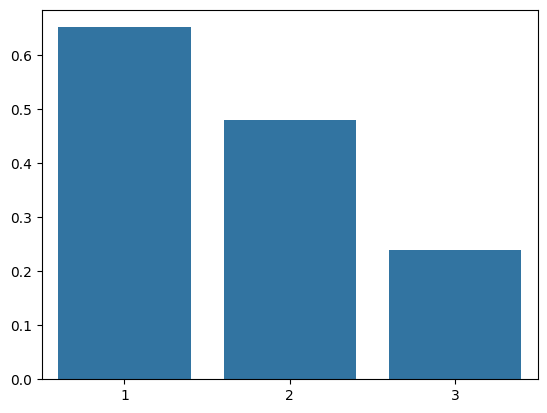

In [ ]:
res = []
for c in (1, 2, 3):
    res.append(training_set[training_set["Pclass"] == c]["Survived"].mean())
    print(f"Выживаемость в {c} классе:", res[-1])
sns.barplot(x=[1, 2, 3], y=res)


9. Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд.

In [ ]:
print("Минимальная сумма:", training_set['Fare'].min())
print("Максимальная сумма:", training_set['Fare'].max())
print("Средняя сумма:", training_set['Fare'].mean())

Минимальная сумма: 0.0
Максимальная сумма: 512.3292
Средняя сумма: 34.567251404494385



10. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.


In [ ]:
print("Минимальная сумма:", training_set[training_set["S"]]['Fare'].min())
print("Максимальная сумма:", training_set[training_set["S"]]['Fare'].max())
print("Средняя сумма:", training_set[training_set["S"]]['Fare'].mean())

Минимальная сумма: 0.0
Максимальная сумма: 263.0
Средняя сумма: 27.476284476534296


11. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

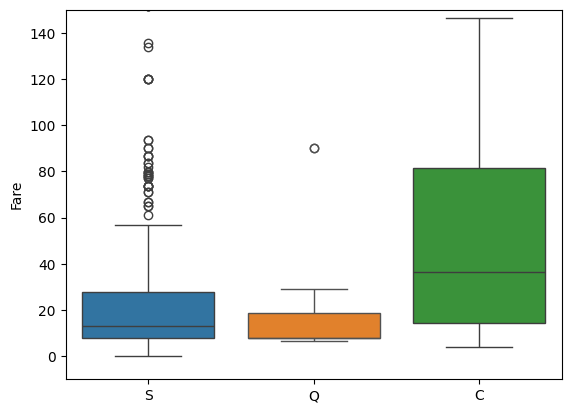

In [ ]:
sns.boxplot(x=0, y="Fare", data=training_set[training_set["S"]])
sns.boxplot(x=1, y="Fare", data=training_set[training_set["Q"]])
sns.boxplot(x=2, y="Fare", data=training_set[~(training_set["S"]|training_set["Q"])])
plt.gca().set_xticks(range(3))
plt.gca().set_xticklabels(list("SQC"))
plt.ylim([-10, 150])
None

12. Оцените репрезентативность представленной выборки. 
    - Сколько всего было пассажиров Титаника? `3320`
    - Сколько из них выжило? `1817`
    - Какую долю составляет представленный набор данных от всей генеральной совокупности? `712 / 3320 = 0.2144`

13. Разделите выборку на тестовую и обучающую части при помощи train_test_split().

In [102]:
X = training_set.drop("Survived", axis=1)
y = training_set["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

14. Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

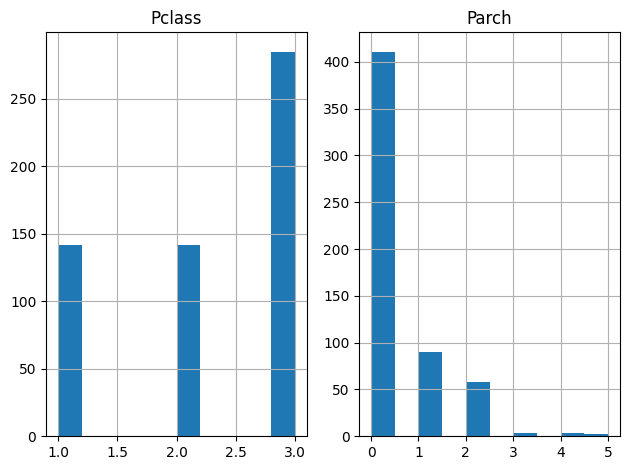

In [107]:
X_train[["Pclass", "Parch"]].hist()
plt.tight_layout()

<Axes: >

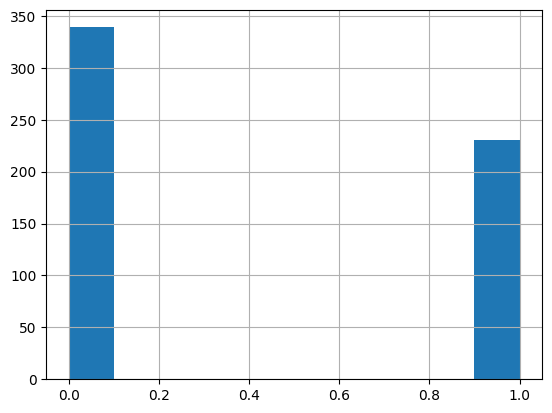

In [109]:
y_train.hist()

Распределение не очень однородоное, попробуем выравнять классы


15. Сбалансируйте классы в исходном датасете двумя способами:
    - Удалите лишние объекты мажоритарного класса (выбранные случайно)
    - Добавьте в выборку дубликаты миноритарного класса.

1560


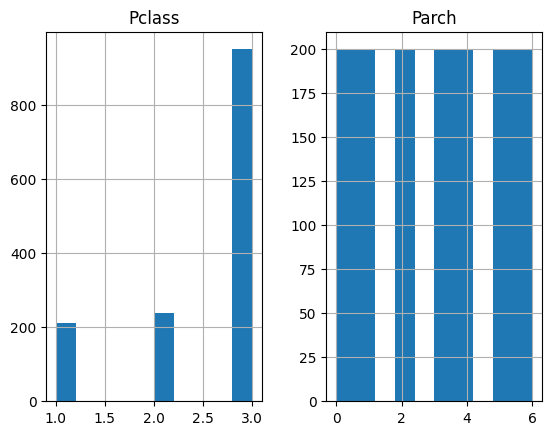

In [250]:
new_training_set = training_set.copy()


k = 200
for col in range(7):
    while sum(new_training_set["Parch"] == col) < k:
        new_training_set = pd.concat(
            [new_training_set, new_training_set[new_training_set["Parch"] == col]]
        )
new_training_set.reset_index(drop=True, inplace=True)
for col in range(7):
    new_training_set = new_training_set.drop(
        new_training_set[new_training_set["Parch"] == col].index[k:]
    )

# Удвоим пассажиров первого и второго класса

new_training_set.reset_index(drop=True, inplace=True)
new_training_set[["Pclass", "Parch"]].hist()


30
60
90
90
120
120
120
160
200
240
280
280
280
280


array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

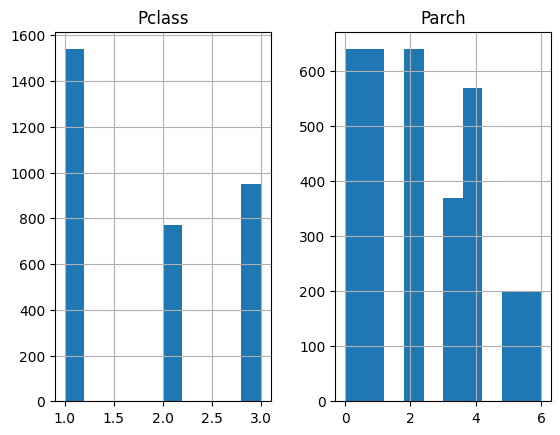

In [259]:
indxes = []
for i in range(7):
    mask = new_training_set[new_training_set["Pclass"] == 1]
    indxes.extend(mask[mask["Parch"] == i].index[:30])
    print(len(indxes))

for i in range(7):
    mask = new_training_set[new_training_set["Pclass"] == 2]
    indxes.extend(mask[mask["Parch"] == i].index[:40])
    print(len(indxes))


new_training_set = pd.concat(
    [new_training_set, new_training_set.loc[indxes]], ignore_index=True
)
new_training_set.reset_index(drop=True, inplace=True)
new_training_set[["Pclass", "Parch"]].hist()


In [242]:
# Мы честно пытались...

(160, 160)

In [263]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


Модель на несбалансированных классах

In [267]:
X = training_set.drop("Survived", axis=1)
y = training_set["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:

print(f"Точность модели: {f1_score(y_test, y_pred)}")


Точность модели: 0.7102803738317757


Модель более-менее несбалансированных классах

In [269]:
X = new_training_set.drop("Survived", axis=1)
y = new_training_set["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [270]:

print(f"Точность модели: {f1_score(y_test, y_pred)}")


Точность модели: 0.843585237258348


<Axes: >

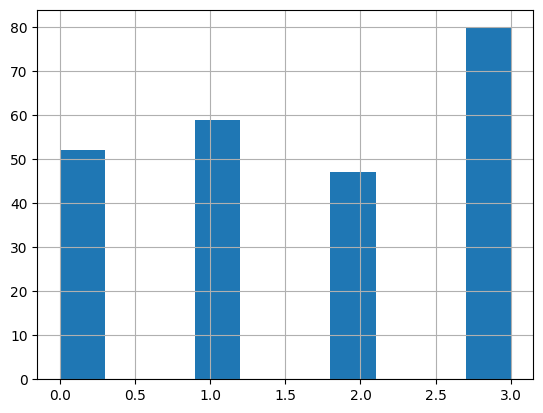

In [233]:
new_training_set[new_training_set["Pclass"] == 2]['Parch'].hist()


16. Проведите исследование эффективности простой модели классификации до и после данных преобразований.


17. Постройте корреляционную матрицу признаков после преобразования данных.
    - Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

<Axes: >

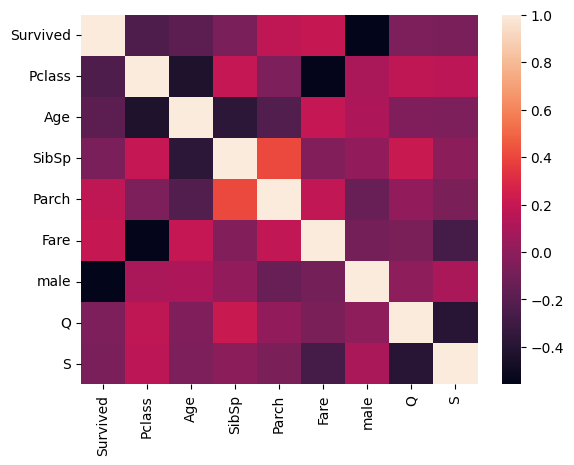

In [168]:
sns.heatmap(new_training_set.corr())

Сильной кореляции не наблюдается

18. Проведите группировку данных по значению возраста.
 Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик".
    - Проведите анализ эффективности данного признака.

Выживаемость kid: 0.5398230088495575
Выживаемость adult: 0.38581314878892736
Выживаемость oldster: 0.19047619047619047


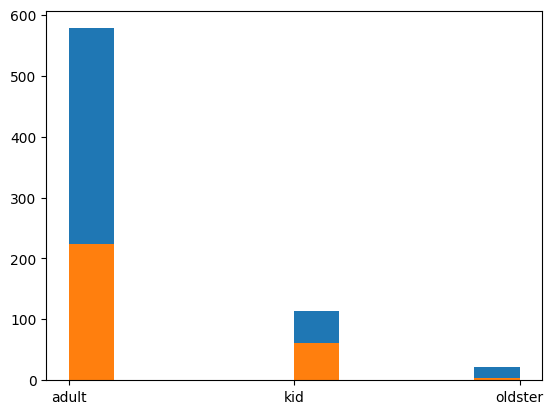

In [ ]:
training_set["kid"] = training_set["Age"] < 18
training_set["oldster"] = training_set["Age"] > 60
training_set["adult"] = (18 <= training_set["Age"]) & (training_set["Age"] <= 60)
training_set[["kid", "adult", "oldster"]].idxmax(axis=1).hist(grid=False)
training_set[["kid", "adult", "oldster"]].idxmax(axis=1)[
    training_set["Survived"] == 1
].hist(grid=False)
for a in ["kid", "adult", "oldster"]:
    print(f"Выживаемость {a}: {training_set[training_set[a]]['Survived'].mean()}")


Чем старше человек, тем меньше вероятность выжить